In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
from datetime import timedelta
from fbprophet import Prophet


In [70]:
sample_data = [{'id': 61, 'username': 'darius', 'name': 'ad', 'amount': '600.00', 'created_at': '2020-05-13T10:02:17.493666Z'}, {'id': 58, 'username': 'darius', 'name': 'aasd', 'amount': '400.00', 'created_at': '2020-04-13T10:01:02.193722Z'}, {'id': 57, 'username': 'darius', 'name': 'asd', 'amount': '100.00', 'created_at': '2020-03-07T14:02:37.561948Z'}, {'id': 55, 'username': 'darius', 'name': 'abc', 'amount': '2000.00', 'created_at': '2020-06-07T12:15:41.179057Z'}, {'id': 51, 'username': 'darius', 'name': 'asd', 'amount': '234.00', 'created_at': '2020-06-06T12:35:44.146423Z'}, {'id': 50, 'username': 'darius', 'name': 'abvcc', 'amount': '24.00', 'created_at': '2020-06-06T12:22:19.818627Z'}]

In [71]:
for objects in sample_data:
    del objects["id"]
    del objects["username"]
    del objects["name"]
    objects["amount"] = float(objects["amount"])

In [72]:
data = pd.DataFrame(sample_data)

In [73]:
data["created_at"] = pd.to_datetime(data["created_at"]) + timedelta(hours=8)
data["created_at"] = data["created_at"].dt.tz_localize(None)

In [74]:
data = data.rename(columns={"created_at":"ds","amount":"y"})

data.head()



,y,ds
0,600.0,2020-05-13 18:02:17.493666
1,400.0,2020-04-13 18:01:02.193722
2,100.0,2020-03-07 22:02:37.561948
3,2000.0,2020-06-07 20:15:41.179057
4,234.0,2020-06-06 20:35:44.146423


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


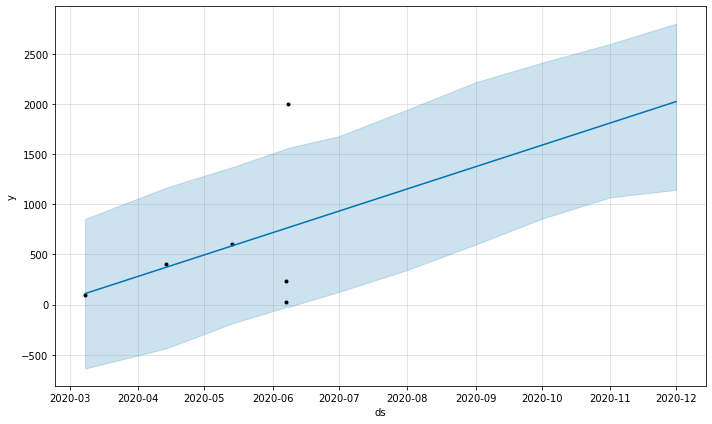

In [89]:

prophet = Prophet(weekly_seasonality=False, daily_seasonality=False,yearly_seasonality=False)
prophet.fit(data)
future = prophet.make_future_dataframe(periods=6,freq="M")
forecast =  prophet.predict(future)
fig = prophet.plot(forecast)

In [80]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-07 22:02:37.561948,109.594998,-636.746390,864.480512,109.594998,109.594998,0.0,0.0,0.0,0.0,0.0,0.0,109.594998
1,2020-04-13 18:01:02.193722,372.730788,-391.422046,1153.075954,372.730788,372.730788,0.0,0.0,0.0,0.0,0.0,0.0,372.730788
2,2020-05-13 18:02:17.493666,587.062177,-141.611173,1396.253584,587.062177,587.062177,0.0,0.0,0.0,0.0,0.0,0.0,587.062177
3,2020-06-06 20:22:19.818627,759.217071,-39.319968,1551.103229,759.217071,759.217071,0.0,0.0,0.0,0.0,0.0,0.0,759.217071
4,2020-06-06 20:35:44.146423,759.283578,35.904306,1541.307599,759.283578,759.283578,0.0,0.0,0.0,0.0,0.0,0.0,759.283578
5,2020-06-07 20:15:41.179057,766.328280,-89.145301,1597.229412,766.328280,766.328280,0.0,0.0,0.0,0.0,0.0,0.0,766.328280
6,2020-06-30 20:15:41.179057,930.644239,170.906850,1700.460800,930.644236,930.644243,0.0,0.0,0.0,0.0,0.0,0.0,930.644239
7,2020-07-31 20:15:41.179057,1152.113575,381.631110,1883.769579,1152.113559,1152.113593,0.0,0.0,0.0,0.0,0.0,0.0,1152.113575
8,2020-08-31 20:15:41.179057,1373.582911,634.320057,2152.529736,1373.582878,1373.582948,0.0,0.0,0.0,0.0,0.0,0.0,1373.582911
9,2020-09-30 20:15:41.179057,1587.908075,893.845558,2379.859668,1587.908017,1587.908135,0.0,0.0,0.0,0.0,0.0,0.0,1587.908075


In [107]:
arr = []

for index, row in forecast.iterrows():
    arr.append({"date":row["ds"],"value":row["yhat"]})

In [108]:
arr

[{'date': Timestamp('2020-03-07 22:02:37.561948'),
  'value': 109.59499782049247},
 {'date': Timestamp('2020-04-13 18:01:02.193722'),
  'value': 372.73078769485466},
 {'date': Timestamp('2020-05-13 18:02:17.493666'), 'value': 587.0621767460678},
 {'date': Timestamp('2020-06-06 20:22:19.818627'), 'value': 759.2170706190312},
 {'date': Timestamp('2020-06-06 20:35:44.146423'), 'value': 759.2835782141594},
 {'date': Timestamp('2020-06-07 20:15:41.179057'), 'value': 766.3282803626164},
 {'date': Timestamp('2020-06-30 20:15:41.179057'), 'value': 930.6442392241556},
 {'date': Timestamp('2020-07-31 20:15:41.179057'),
  'value': 1152.1135750810126},
 {'date': Timestamp('2020-08-31 20:15:41.179057'), 'value': 1373.58291093787},
 {'date': Timestamp('2020-09-30 20:15:41.179057'),
  'value': 1587.9080746703128},
 {'date': Timestamp('2020-10-31 20:15:41.179057'), 'value': 1809.37741052717},
 {'date': Timestamp('2020-11-30 20:15:41.179057'),
  'value': 2023.7025742596124}]